<a href="https://colab.research.google.com/github/Radhibomma/GCollab/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [14]:
# ratings = pd.read_csv(r'datasets/title.ratings.tsv/data.tsv',sep='\t')

In [15]:
# akas = pd.read_csv(r'datasets/title.akas.tsv/data.tsv', sep='\t',low_memory=False)
# basics = pd.read_csv(r'datasets/title.basics.tsv/data.tsv', sep='\t',low_memory=False)

In [16]:
# df = pd.merge(basics,ratings,on='tconst')

In [17]:
# df.to_csv('imdb_large.csv',index=False)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/MSAI631/imdb_sampled.csv',low_memory=False)

In [20]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [21]:
df['startYear'] = [0 if year == '\\N' else int(year) for year in df['startYear']]

In [22]:
df['endYear'] = [year if year == '\\N' else int(year) for year in df['endYear']]

In [23]:
df = df[df['startYear']>=1960]

In [25]:
df.drop(['runtimeMinutes'],axis=1,inplace=True)

KeyError: "['runtimeMinutes'] not found in axis"

In [26]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [27]:
df['titleType'].value_counts()

,count
titleType,
movie,10286
tvSeries,2706
tvMiniSeries,417
tvMovie,358
video,189
tvSpecial,95


In [28]:
def helper_func(title_type):
    if title_type in ['short','tvShort','tvEpisode','videoGame']:
        return np.nan
    else:
        return title_type

In [30]:
df['titleType'] =  df['titleType'].apply(helper_func)

In [31]:
df = df[df['titleType'].notna()]

In [37]:
df['genres'] = df['genres'].apply(lambda x: np.nan if x == '\\N' else x)

In [32]:
df = df[df['genres'].notna()]

In [36]:
df.reset_index(drop=True,inplace=True)

In [35]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [34]:
df.to_csv('imdb.csv',index=False)

In [38]:
imdb = pd.read_csv('imdb.csv')

In [39]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


<ipython-input-40-f18eae1515dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb['averageRating'])


<Axes: xlabel='averageRating', ylabel='Density'>

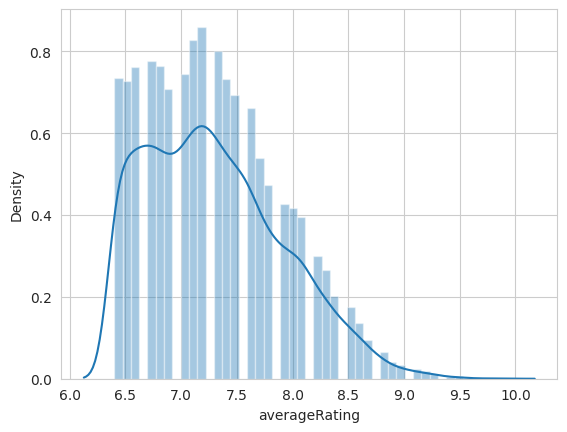

In [40]:
sns.distplot(imdb['averageRating'])

<ipython-input-41-e9a0c76e7c37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)


<Axes: xlabel='numVotes', ylabel='Density'>

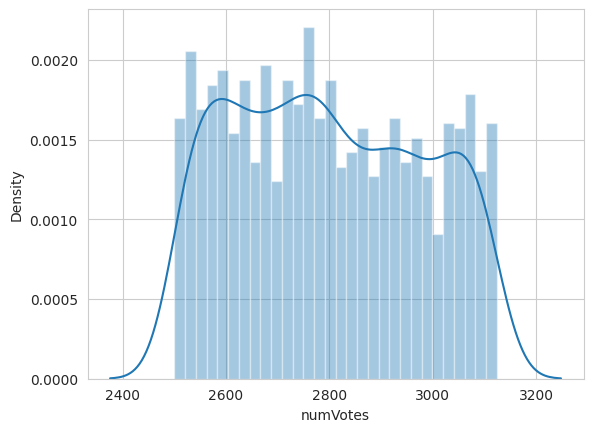

In [41]:
sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)

In [42]:
imdb['numVotes'].describe(percentiles=[0.25,0.75,0.95]).round(2)

,numVotes
count,14051.00
mean,48475.77
std,124403.67
min,2500.00
25%,4288.50
50%,9051.00
75%,31584.50
95%,235282.50
max,2260919.00


In [43]:
imdb['averageRating'].describe(percentiles=[0.25,0.75,0.95]).round(2)

,averageRating
count,14051.00
mean,7.30
std,0.61
min,6.40
25%,6.80
50%,7.20
75%,7.70
95%,8.40
max,9.90


In [44]:
imdb.corr()

ValueError: could not convert string to float: 'tt1509787'

In [46]:
imdb = pd.read_csv('imdb.csv')

In [47]:
imdb = imdb[(imdb['numVotes']>=2500) & (imdb['averageRating']>=6.4)]

In [48]:
imdb.reset_index(drop=True,inplace=True)

In [49]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [50]:
imdb['startYear'] = [year if year == '\\N' else int(year) for year in imdb['startYear']]

In [51]:
imdb['endYear'] = [year if year == '\\N' else int(year) for year in imdb['endYear']]

In [52]:
imdb['primaryTitle'] = imdb['primaryTitle'].apply(lambda x: x.strip("'*"))
bool_mask = imdb['primaryTitle'].str[0].str.isalpha()
alpha_list = imdb['primaryTitle'][bool_mask].sort_values()
non_alpha_list = imdb['primaryTitle'][~bool_mask].sort_values()
imdb = imdb.iloc[alpha_list.append(non_alpha_list).index]

AttributeError: 'Series' object has no attribute 'append'

In [100]:
imdb.index = imdb['tconst']

In [99]:
tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']

In [101]:
movie_df = imdb[imdb['titleType'].apply(lambda x: x not in tv_shows)]

In [102]:
tv_shows_df = imdb[imdb['titleType'].apply(lambda x: x in tv_shows)]

In [103]:
tv_shows_dict = {k: f"{t} ({s})" if s == e else f"{t} ({s}– )" if e =='\\N' else f"{t} ({s}–{e})" for k,t,s,e in tv_shows_df[['primaryTitle','startYear','endYear']].itertuples()}

In [104]:
movie_dict = {k: f"{t} ({s})"  for k,t,s,e in movie_df[['primaryTitle','startYear','endYear']].itertuples()}

In [108]:
sortedTitle = pd.Series(tv_shows_dict).append(pd.Series(movie_dict))

AttributeError: 'Series' object has no attribute 'append'

In [107]:
imdb.reset_index(drop=True, inplace=True)

In [118]:
sortedTitle = pd.DataFrame(sortedTitle).reset_index().rename({'index':'tconst',0:'sortedTitle'},axis=1)

NameError: name 'sortedTitle' is not defined

In [117]:
sortedTitle.head()

NameError: name 'sortedTitle' is not defined

In [116]:
imdb = imdb.merge(sortedTitle, on='tconst')

NameError: name 'sortedTitle' is not defined

In [113]:
imdb['genres'] = [genre.replace(',', ' ') for genre in imdb['genres']]

In [112]:
imdb['imdb_url'] = imdb['tconst'].apply(lambda titleId: f'https://www.imdb.com/title/{titleId}/')

In [111]:
imdb.reset_index(drop=True, inplace=True)

In [110]:
imdb.to_csv('imdb_sampled.csv', index=False)

In [109]:
imdb = pd.read_csv('imdb_sampled.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'imdb_sampled.csv'

In [72]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
cv = CountVectorizer(dtype=np.uint8)

In [59]:
dtm = cv.fit_transform(imdb['genres']).toarray()

In [78]:
dtm.shape

(14051, 30)

In [61]:
new_matrix = np.concatenate((dtm, np.array(imdb['averageRating']).reshape(-1,1)),axis=1)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
MMS = MinMaxScaler()

In [94]:
numVotes = np.array(imdb['numVotes'])

In [86]:
numVotes = numVotes.reshape(-1,1)

In [87]:
numVotes = MMS.fit_transform(numVotes)

In [88]:
new_matrix = np.concatenate((new_matrix,numVotes),axis=1)

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
similarities = cosine_similarity(new_matrix,dense_output=False)

In [71]:
similarities.shape

(14051, 14051)

In [79]:
def build_recommendations(title):
    try:
        title = title.lower()
        tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']
#         sorted_title_found = True in imdb['sortedTitle'].apply(lambda t: t.lower() == title)
        try:
            idx = imdb[imdb['sortedTitle'].apply(lambda x: x.lower())==title].index[0]
        except:
            idx = imdb[imdb['primaryTitle'].apply(lambda x: x.lower())==title].index[0]

        recommendations = imdb['sortedTitle'].iloc[similarities[idx].argsort()[::-1]][0:500] # slicing only 500 values for improved performance (process explained below)

        if imdb.iloc[idx]['titleType'] != 'movie':
            tv_recommendations = {rec:[imdb['tconst'].iloc[rec],imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] in tv_shows}
            return pd.DataFrame(tv_recommendations).transpose().iloc[1:11]

        else:
            movie_recommendations = {rec:[imdb['tconst'].iloc[rec], imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] == 'movie'}
            return pd.DataFrame(movie_recommendations).transpose().iloc[1:11]
    except:
        return None

In [80]:
def get_recommendations(title):
    recommendations = build_recommendations(title)
    if recommendations is None:
        return recommendations
    else:
        recommendations.rename(columns={0:'tconst',1:'title'},inplace=True)
        recommendations.reset_index(drop=True, inplace=True)
        recommendations['urls'] = [f'https://www.imdb.com/title/{title_id}/' for title_id in recommendations['tconst']]
        return recommendations.drop('tconst',axis=1)

In [95]:
# before slicing
%timeit get_recommendations('IT')

39.3 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
recom_len = []
for item in imdb['primaryTitle']:
    recom_len.append(build_recommendations(item).shape[0])

In [84]:
# we can see here, we only need to slice 500 values to get atleast 10 recommendations of the same category (tvShow or movie)
# see 'min' value
slice_500 = pd.Series(recom_len).describe().round(2)
slice_500

,0
count,14051.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


In [96]:
%timeit get_recommendations('IT')

33.5 ms ± 698 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
# After slicing only the required sample of values from 'recommendations' variable (i.e minimum value of 10) we see a drastic
# performance improvement
print(f"Speed of Prediction: {((854-36.6)/854)*100:.2f}% increase")

Speed of Prediction: 95.71% increase


In [98]:
get_recommendations('Interstellar')

,title,urls
0,The Martian (2015),https://www.imdb.com/title/tt3659388/
1,Battle Royale (2000),https://www.imdb.com/title/tt0266308/
2,Time After Time (1979),https://www.imdb.com/title/tt0080025/
3,2001: A Space Odyssey (1968),https://www.imdb.com/title/tt0062622/
4,A.I. Artificial Intelligence (2001),https://www.imdb.com/title/tt0212720/
5,Brazil (1985),https://www.imdb.com/title/tt0088846/
6,Planet of the Apes (1968),https://www.imdb.com/title/tt0063442/
7,Close Encounters of the Third Kind (1977),https://www.imdb.com/title/tt0075860/
8,Stalker (1979),https://www.imdb.com/title/tt0079944/
9,Melancholia (2011),https://www.imdb.com/title/tt1527186/
